# Multi-Armed Bandits

In [1]:
import math
import random
import matplotlib.pyplot as plt

In [2]:
class Action:
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma
    
    def perform(self):
        return random.gauss(self.mu, self.sigma)

In [3]:
class MultiArmedBandit:
    def __init__(self, n_arms, epsilon, alpha, exploration_degree):
        self.t = 0
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.alpha = alpha
        self.exploration_degree = exploration_degree
        self.actions = []
        self.counts = [0] * n_arms
        self.values = [0.0] * n_arms
        for _ in range(n_arms):
            self.actions.append(Action(random.uniform(0, 5), random.uniform(0, 1)))
    
    def argmax(self, x):
        m = max(x)
        return random.choice([i for i in range(len(x)) if x[i] == m])
    
    def select_action(self):
        if random.random() > self.epsilon: # exploitation
            ucb = [self.values[i] + self.exploration_degree * math.sqrt(math.log(self.t + 1e-10) / (self.counts[i] + 1e-10))
                   for i in range(self.n_arms)]
            return self.argmax(ucb)
        else: # exploration
            return random.randrange(self.n_arms)
    
    def update(self, action, reward):
        # Q(k+1) = Q(k) + a * [R(k) - Q(k)]
        self.values[action] += self.alpha * (reward - self.values[action])
        self.counts[action] += 1
    
    def perform(self):
        self.t += 1
        action = self.select_action()
        reward = self.actions[action].perform()
        self.update(action, reward)
        return reward

In [4]:
def test(epsilon, time):
    mab = MultiArmedBandit(10, epsilon, 0.2, 0.5)
    rewards = [mab.perform()]
    for t in range(1, time):
        rewards.append((rewards[-1] * t + mab.perform()) / (t + 1))
    return rewards

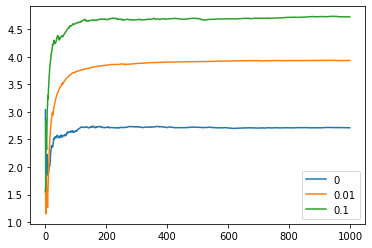

In [8]:
time = 1000
epsilons = [0, 0.01, 0.1]

for e in epsilons:
    plt.plot(range(time), test(e, time))

plt.legend(epsilons)
plt.show()